In [104]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from uncertainties import ufloat
from uncertainties import unumpy
import scipy.misc
import scipy.stats


In [242]:
raw_data_array_a = pd.read_csv('lab6_exp4_aluminum.csv')
raw_data_a = pd.DataFrame(raw_data_array_a).to_numpy()
t_a = raw_data_a[:,0][250:] - raw_data_a[:,0][250]
T_a = raw_data_a[:,1][250:] + 273.15

raw_data_array_b = pd.read_csv('lab6_exp4_brass.csv')
raw_data_b = pd.DataFrame(raw_data_array_b).to_numpy()
t_b = raw_data_b[:,0][210:] - raw_data_b[:,0][210]
T_b = raw_data_b[:,1][210:] + 273.15

raw_data_array_c = pd.read_csv('lab6_exp4_copper.csv')
raw_data_c = pd.DataFrame(raw_data_array_c).to_numpy()
t_c = raw_data_c[:,0][120:] - raw_data_c[:,0][120]
T_c = raw_data_c[:,1][120:] + 273.15


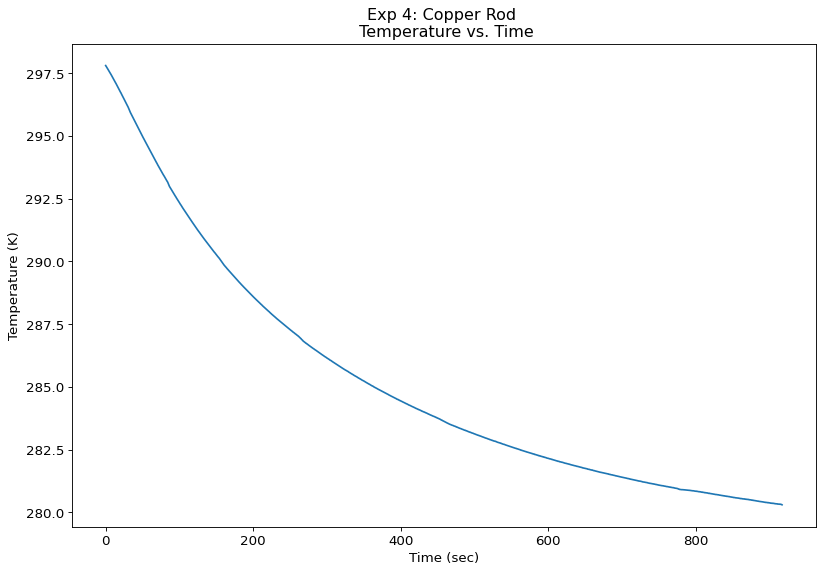

In [203]:
fig1=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.plot(t_c, T_c)

plt.title("Exp 4: Copper Rod \n Temperature vs. Time")
plt.xlabel("Time (sec)")
plt.ylabel("Temperature (K)")

# plt.text(.14,-.55, "k = %5.4f \u00b1 %5.4f $kg/s^2$" % (-m, dm))
# plt.text(.14,-.7, "c = %5.4f \u00b1 %5.4f $N$" % (b, db))
# plt.xlim(0,.257)
# plt.ylim(-3.7,0)
# plt.legend()
plt.show()

In [279]:
L = .1265 # m

# def gamma(kappa):
#     return np.pi ** 2 * kappa / (L ** 2 * rho * c)

def get_kappa(gamma):
    return (gamma * L ** 2 * rho * c) / np.pi ** 2

def T_n1(t, T_o, gamma, off):
    return 4 * T_o / np.pi * np.exp(-gamma * t / 2) + off


/var/folders/47/0pv_3t814gx1fytsv44kdscw0000gn/T/ipykernel_15132/1728010700.py:10: RuntimeWarning: overflow encountered in exp
  return 4 * T_o / np.pi * np.exp(-gamma * t / 2) + off
/var/folders/47/0pv_3t814gx1fytsv44kdscw0000gn/T/ipykernel_15132/1728010700.py:10: RuntimeWarning: overflow encountered in multiply
  return 4 * T_o / np.pi * np.exp(-gamma * t / 2) + off


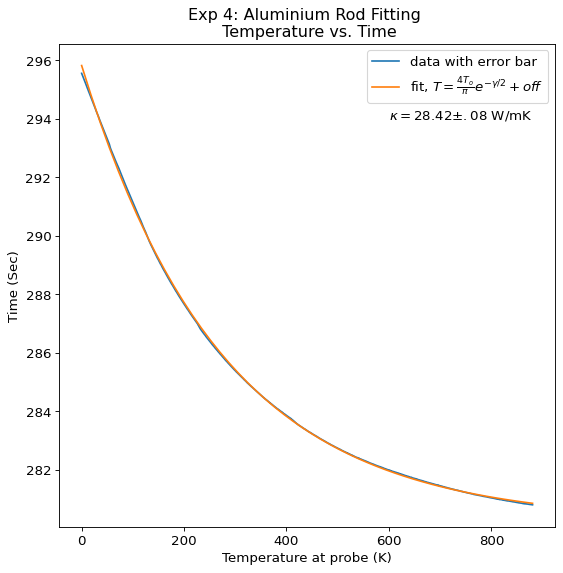

In [310]:
# Aluminium

rho = 2700 # kg / m^3
c = 890 # J/kgK

# Does the fit
init_params=[300, 10, 10]
lin_opt, lin_cov = opt.curve_fit(T_n1, t_a, T_a, p0=init_params)

# Best fit values
T_o, gamma, off = lin_opt
dT_o, dgamma, doff = np.sqrt(np.diag(lin_cov))

fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.plot(t_a, T_a, label="data with error bar")
x_space = np.linspace(t_a[0],t_a[-1])
plt.plot(x_space, T_n1(x_space, T_o, gamma, off), label=r'fit, $T=\frac{4 T_o}{\pi} e^{-\gamma / 2} + off$', color='tab:orange')

plt.title("Exp 4: Aluminium Rod Fitting \n Temperature vs. Time")
plt.xlabel("Temperature at probe (K)")
plt.ylabel("Time (Sec)")

plt.text(600,294, r"$\kappa = 28.42 ± .08$ W/mK")
# plt.text(.14,-.7, "c = %5.4f \u00b1 %5.4f $N$" % (b, db))
# plt.xlim(0,.257)
# plt.ylim(-3.7,0)
plt.legend()
plt.show()


In [311]:
# 88-251 W/mK

get_kappa(ufloat(gamma, dgamma))

# 236 / .0286

28.610220457731558+/-0.025989835901985257

In [312]:
T_o

12.231979515654794

/var/folders/47/0pv_3t814gx1fytsv44kdscw0000gn/T/ipykernel_15132/1728010700.py:10: RuntimeWarning: overflow encountered in exp
  return 4 * T_o / np.pi * np.exp(-gamma * t / 2) + off
/var/folders/47/0pv_3t814gx1fytsv44kdscw0000gn/T/ipykernel_15132/1728010700.py:10: RuntimeWarning: overflow encountered in multiply
  return 4 * T_o / np.pi * np.exp(-gamma * t / 2) + off


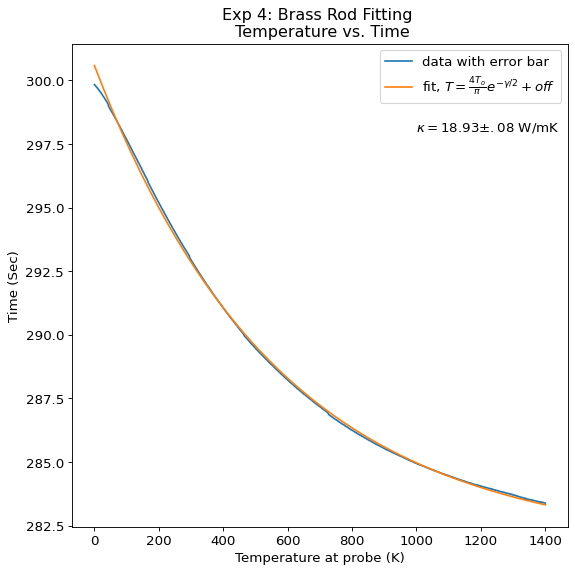

In [313]:
# Brass

rho = 8760 # kg / m^3
c = 380 # J/kgK

# Does the fit
init_params=[300, 10, 10]
lin_opt, lin_cov = opt.curve_fit(T_n1, t_b, T_b, p0=init_params)

# Best fit values
T_o, gamma, off = lin_opt
dT_o, dgamma, doff = np.sqrt(np.diag(lin_cov))

fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.plot(t_b, T_b, label="data with error bar")
x_space = np.linspace(t_b[0],t_b[-1])
plt.plot(x_space, T_n1(x_space, T_o, gamma, off), label=r'fit, $T=\frac{4 T_o}{\pi} e^{-\gamma / 2} + off$', color='tab:orange')

plt.title("Exp 4: Brass Rod Fitting \n Temperature vs. Time")
plt.xlabel("Temperature at probe (K)")
plt.ylabel("Time (Sec)")

plt.text(1000,298, r"$\kappa = 18.93 ± .08$ W/mK")
# plt.text(.14,-.7, "c = %5.4f \u00b1 %5.4f $N$" % (b, db))
# plt.xlim(0,.257)
# plt.ylim(-3.7,0)
plt.legend()
plt.show()


In [314]:
# 147

get_kappa(ufloat(gamma, dgamma))

# 147 / .0189

18.92810700445088+/-0.032352298273780083

In [315]:
T_o

14.831402151611307

/var/folders/47/0pv_3t814gx1fytsv44kdscw0000gn/T/ipykernel_15132/1728010700.py:10: RuntimeWarning: overflow encountered in exp
  return 4 * T_o / np.pi * np.exp(-gamma * t / 2) + off
/var/folders/47/0pv_3t814gx1fytsv44kdscw0000gn/T/ipykernel_15132/1728010700.py:10: RuntimeWarning: overflow encountered in multiply
  return 4 * T_o / np.pi * np.exp(-gamma * t / 2) + off


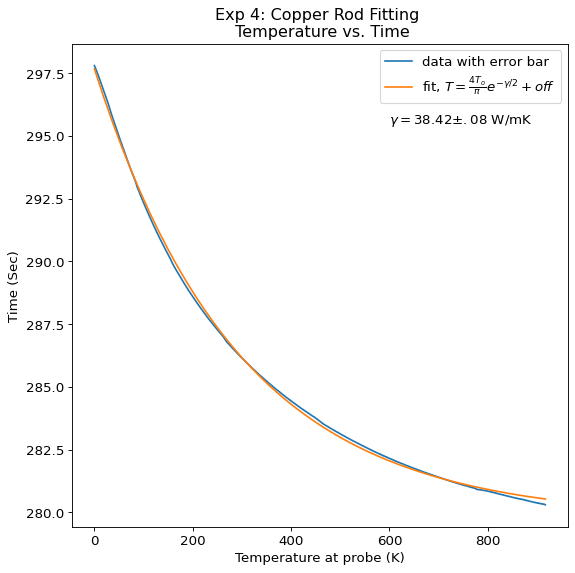

In [316]:
# Copper

rho = 8960 # kg / m^3
c = 386 # J/kgK

# Does the fit
init_params=[300, 10, 10]
lin_opt, lin_cov = opt.curve_fit(T_n1, t_c, T_c, p0=init_params)

# Best fit values
T_o, gamma, off = lin_opt
dT_o, dgamma, doff = np.sqrt(np.diag(lin_cov))

fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.plot(t_c, T_c, label="data with error bar")
x_space = np.linspace(t_c[0],t_c[-1])
plt.plot(x_space, T_n1(x_space, T_o, gamma, off), label=r'fit, $T=\frac{4 T_o}{\pi} e^{-\gamma / 2} + off$', color='tab:orange')

plt.title("Exp 4: Copper Rod Fitting \n Temperature vs. Time")
plt.xlabel("Temperature at probe (K)")
plt.ylabel("Time (Sec)")

plt.text(600,295.5, r"$\gamma = 38.42 ± .08$ W/mK")
# plt.text(.14,-.7, "c = %5.4f \u00b1 %5.4f $N$" % (b, db))
# plt.xlim(0,.257)
# plt.ylim(-3.7,0)
plt.legend()
plt.show()



In [317]:
# 398

get_kappa(ufloat(gamma, dgamma))

# 398 / .0384

38.42489704206887+/-0.07691446250702992

In [319]:
dT_o

0.009336167405632085

/var/folders/47/0pv_3t814gx1fytsv44kdscw0000gn/T/ipykernel_15132/433880120.py:4: RuntimeWarning: overflow encountered in exp
  return 4 * A / np.pi * np.exp(-B * x / 2) + C
/var/folders/47/0pv_3t814gx1fytsv44kdscw0000gn/T/ipykernel_15132/433880120.py:4: RuntimeWarning: overflow encountered in multiply
  return 4 * A / np.pi * np.exp(-B * x / 2) + C


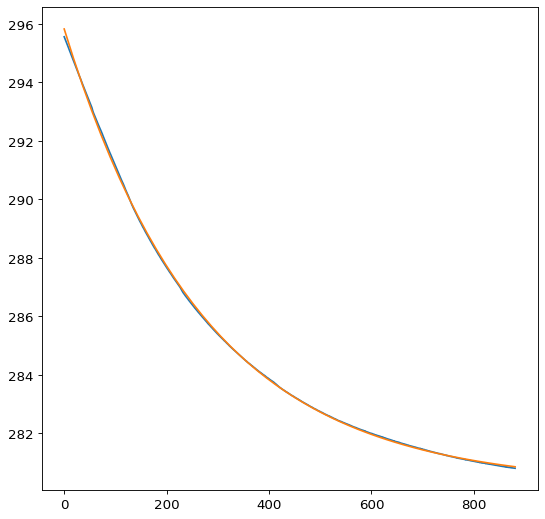

In [287]:
# NA

def test(x, A, B, C):
    return 4 * A / np.pi * np.exp(-B * x / 2) + C

# Does the fit
init_params=[300, 10, 10]
lin_opt, lin_cov = opt.curve_fit(test, t_a, T_a, p0=init_params)

# Best fit values
A, B, C = lin_opt
dA, dB, dC= np.sqrt(np.diag(lin_cov))

fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.plot(t_a, T_a, label="data with error bar")
x_space = np.linspace(t_a[0],t_a[-1])
plt.plot(x_space, test(x_space, A, B, C), label='fit, F=-Kx (+c)', color='tab:orange')

# plt.title("Exp 1: Test \n Displacement vs. Force")
# plt.xlabel("Displacement (m)")
# plt.ylabel("Force (N)")

# plt.text(.14,-.55, "k = %5.4f \u00b1 %5.4f $kg/s^2$" % (-m, dm))
# plt.text(.14,-.7, "c = %5.4f \u00b1 %5.4f $N$" % (b, db))
# plt.xlim(0,.257)
# plt.ylim(-3.7,0)
# plt.legend()
plt.show()

/var/folders/47/0pv_3t814gx1fytsv44kdscw0000gn/T/ipykernel_15132/1793426192.py:7: RuntimeWarning: overflow encountered in exp
  return 4 * T_o / np.pi * np.exp(-gamma * t / 2) + off
/var/folders/47/0pv_3t814gx1fytsv44kdscw0000gn/T/ipykernel_15132/1793426192.py:7: RuntimeWarning: overflow encountered in multiply
  return 4 * T_o / np.pi * np.exp(-gamma * t / 2) + off


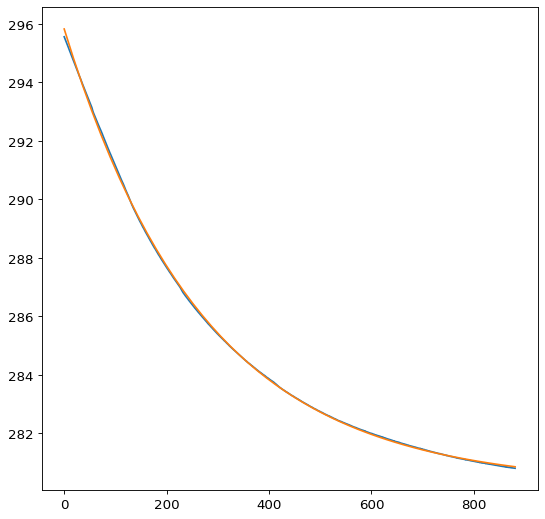

In [160]:
# NA

L = .1265 # m

# def gamma(kappa):
#     return np.pi ** 2 * kappa / (L ** 2 * rho * c)

def T_n1(t, T_o, gamma, off):
    return 4 * T_o / np.pi * np.exp(-gamma * t / 2) + off

# Aluminium

rho = 2.7 # kg / m^3
c = 890 # J/kgK

# Does the fit
init_params=[300, 10, 10]
lin_opt, lin_cov = opt.curve_fit(T_n1, t_a, T_a, p0=init_params)

# Best fit values
T_o, gamma, off = lin_opt
dT_o, dgamma, doff = np.sqrt(np.diag(lin_cov))

fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.plot(t_a, T_a, label="data with error bar")
x_space = np.linspace(t_a[0],t_a[-1])
plt.plot(x_space, T_n1(x_space, T_o, gamma, off), label='fit, F=-Kx (+c)', color='tab:orange')

# plt.title("Exp 1: Test \n Displacement vs. Force")
# plt.xlabel("Displacement (m)")
# plt.ylabel("Force (N)")

# plt.text(.14,-.55, "k = %5.4f \u00b1 %5.4f $kg/s^2$" % (-m, dm))
# plt.text(.14,-.7, "c = %5.4f \u00b1 %5.4f $N$" % (b, db))
# plt.xlim(0,.257)
# plt.ylim(-3.7,0)
# plt.legend()
plt.show()

